In [16]:
# # !pip install --upgrade --force-reinstall pandas
# !pip uninstall pandas
# !pip install pandas

In [17]:
import seaborn as sns
# import pandas as pd
import pandas; print(pandas.__version__)


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# For data processing
import numpy as np
import pandas as pd
import scipy.stats as stats

# For API usage
import requests as r

# For progress bar
from tqdm import tqdm






1.5.3


In [18]:
numerical_data = pd.read_csv('cleaned_1015.csv', usecols = ['BUDGET', 'VOTE_AVERAGE'])
top_10 = numerical_data.head(10)



In [19]:

# numerical_data = numerical_data.dropna()
numerical_data.isnull().sum()





# movie_nonnull = movie_cleaning.dropna()
# movie_nonnull.isnull().sum()



VOTE_AVERAGE    0
BUDGET          0
dtype: int64

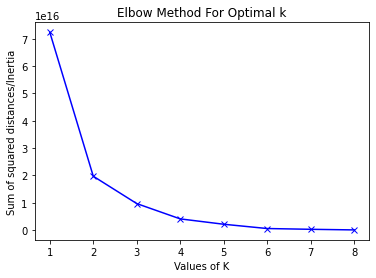

In [20]:
Sum_of_squared_distances = []
K = range(1,9)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(top_10)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
         
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()